## Univariate roc-auc or mse (or any other metric really)

This procedure works as follows:

- First, it builds one decision tree per feature, to predict the target
- Second, it makes predictions using the decision tree and the mentioned feature
- Third, it measures the performance of that prediction, be it the roc-auc, the mse, or any other metric
- Fourth, it ranks the features according to the machine learning metric (roc-auc or mse)
- It selects the highest ranking features

Here, I will demonstrate how to select features based on univariate roc-auc or univariate mse.

In [1]:
# import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# to train and predict per feature 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# to evaluate the performance for each feature against the target
from sklearn.metrics import roc_auc_score, mean_squared_error

In [2]:
# load data
data = pd.read_csv('..\precleaned-datasets\dataset_2.csv')
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [3]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

## Classification

In [4]:
# get the roc_auc for each feature

roc_auc = []

for var in X_train.columns:
    
    # initialize the model - Decision Tree
    clf = DecisionTreeClassifier()
    
    # train using the feature
    clf.fit(X_train[var].to_frame(), y_train)
    
    # get predictions 
    preds = clf.predict_proba(X_test[var].to_frame())
    
    # get the roc score
    roc_score = roc_auc_score(y_test, preds[:,1])
    roc_auc.append(roc_score)
    
# display the result
roc_auc[:10]

[0.5069248231292061,
 0.5006908738145861,
 0.4931445654646017,
 0.5039101753068067,
 0.5014351366034588,
 0.5028347252717772,
 0.5095234564543892,
 0.5062626193645395,
 0.4913455716601861,
 0.5066196352647712]

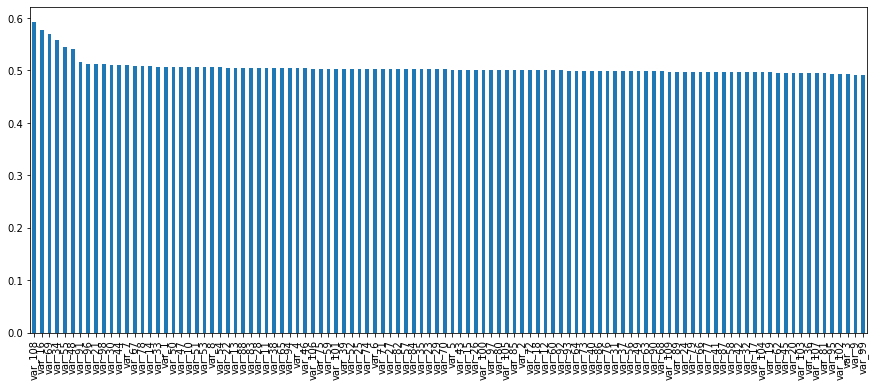

In [6]:
# convert it into a Series

roc_auc = pd.Series(roc_auc)
roc_auc.index = X_train.columns
roc_auc.sort_values(ascending=False).plot.bar(figsize= (15, 6))
plt.show();

In [8]:
# a roc auc value of 0.5 indicates random decision
# let's check how many features show a roc-auc value
# higher than random

len(roc_auc[roc_auc>0.5])

67

67 of 108  features show a predictive performance higher than 0.5.

We can of course tune the parameters of the Decision Tree to get better predictions and thus, more reliable metrics.

### Select features with roc-auc > 0.5

In [10]:
features_to_keep = roc_auc[roc_auc>0.5].index
features_to_keep

Index(['var_1', 'var_2', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_10',
       'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_18',
       'var_21', 'var_22', 'var_23', 'var_25', 'var_26', 'var_27', 'var_28',
       'var_29', 'var_30', 'var_33', 'var_34', 'var_35', 'var_38', 'var_39',
       'var_43', 'var_44', 'var_46', 'var_47', 'var_48', 'var_50', 'var_51',
       'var_52', 'var_53', 'var_54', 'var_55', 'var_57', 'var_59', 'var_65',
       'var_67', 'var_69', 'var_70', 'var_71', 'var_72', 'var_74', 'var_75',
       'var_78', 'var_80', 'var_82', 'var_83', 'var_84', 'var_85', 'var_88',
       'var_91', 'var_94', 'var_96', 'var_97', 'var_98', 'var_100', 'var_101',
       'var_105', 'var_106', 'var_108'],
      dtype='object')

In [11]:
# select features in the dataframe
X_train = X_train[features_to_keep]
X_test = X_test[features_to_keep]

In [12]:
X_train.shape, X_test.shape

((35000, 67), (15000, 67))

## Regression

In [29]:
# load data

data = pd.read_csv('house_price.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [31]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [32]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [17]:
X_train.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

### Determine the univariate features using MSE

In [33]:
mse_list = []

for feature in X_train.columns:
    
    clf = DecisionTreeRegressor()
    
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    
    preds = clf.predict(X_test[feature].fillna(0).to_frame())
    
    mse = mean_squared_error(y_test, preds)
    
    mse_list.append(mse)
    
# display the first 10 values in mse_list 
print(mse_list[:10])

[13268032828.324202, 5258423546.061133, 6827291221.813821, 8379936849.301367, 2097026635.6820993, 6026309350.815287, 4776574901.81357, 5138584000.327346, 7867108586.811187, 7696158357.724333]


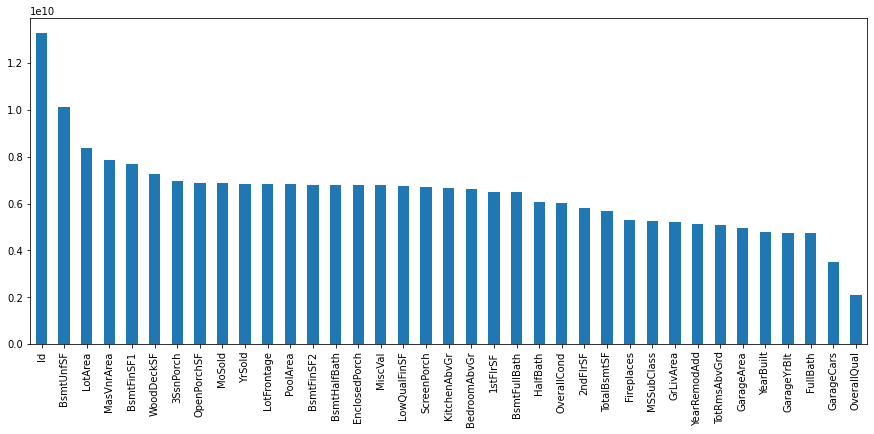

In [34]:
# convert it into a series

mse_list = pd.Series(mse_list)
mse_list.index= X_train.columns
mse_list.sort_values(ascending = False).plot.bar(figsize=(15,6))
plt.show();

Remember that for regression, the smaller the mse, the better the model performance is.

To select features, we need a threshold, or cut-off. To follow Scikit-learn selection implementation, which we will discuss in coming notebooks, I will select those features which mse is below the mean mse.

### Select features

In [35]:
# get the mean mse
mean_mse = mse_list.mean()
mean_mse

6409913035.900881

In [36]:
selected_features = mse_list[mse_list < mean_mse].index
selected_features

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea'],
      dtype='object')

In [37]:
len(selected_features)

15

In [38]:
# retain only the selected features

X_train = X_train[selected_features]
X_test = X_test[selected_features]

X_train.shape, X_test.shape

((1022, 15), (438, 15))